In [9]:
import h5py
import matplotlib.pylab as plt
import numpy
import glob
import os,sys
import matplotlib.gridspec as gridspec
import xarray as xr 
import pandas as pd
import numpy as np
from tqdm import tqdm

import matplotlib
#matplotlib.use('Agg')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.


In [10]:
fn = '/raid8/srvx1/federico/GitHub/CEUAS_master_FEBRUARY2021/CEUAS/CEUAS/public/merge/PROVA/0-20000-0-94120_CEUAS_merged_v0_twohours.nc'
f = h5py.File(fn,'r')
nm = fn.split('/')[-1]
SIZE = 1.5
#print(list(f['observations_table'].keys()))
fo=f['observations_table']


os.system('mkdir Plots')
    

256

In [11]:
def plot_comparison(p, zoom= ''):
        
        fig = plt.figure(constrained_layout = True, figsize=(10,10))
        
        gs = gridspec.GridSpec(3, 1, figure = fig) # (number of rows, number of columns )
        ax = fig.add_subplot(gs[0,:])
        print(p)
        
        mask=numpy.logical_and(fo['z_coordinate'][:]==p, fo['observed_variable'][:]==85)
        #print(fn,numpy.sum(numpy.logical_and(fo['date_time'][mask]/365.25/86400>=60,fo['date_time'][mask]/365.25/86400<61)))
        
        
        time = [1900 + f for f in fo['date_time'][mask]/365.25/86400 ] 
        plt.scatter(time,fo['observation_value'][mask], label = nm, color = 'blue' , s = SIZE)
        ax.legend()
        if zoom:
                
                ax.set_xlim(1955,1965)
        else:
                
                ax.set_xlim(1945,1980)
                
        #ax.set_ylim(180,300)
        
        ax.set_title(' p=' + str(p) + ' [Pa]' , y = 1.02 , fontsize = 14)    
        
        fns=glob.glob('/raid60/scratch/leo/scratch/era5/odbs/2/era5_2/*94120*.nc')    
        for fn,i in zip(fns,[1,2]):
            ax = fig.add_subplot(gs[i,:])
            
            n = fn.split('/')[-1]
            fg=h5py.File(fn,'r')
    
            foo=fg['observations_table']
            mask=numpy.logical_and(foo['z_coordinate'][:]==p, foo['observed_variable'][:]==85)
            #print(fn,numpy.sum(numpy.logical_and(fo['date_time'][mask]/365.25/86400>=60,fo['date_time'][mask]/365.25/86400<61)))
            time = [1900 + f for f in foo['date_time'][mask]/365.25/86400 ]    
            plt.scatter(time,foo['observation_value'][mask] , label = n, s = SIZE)
            ax.legend()
            
            if zoom:
                ax.set_xlim(1955,1965)
            else:
                ax.set_xlim(1945,1980)
            #ax.set_ylim(180,300)
            
        if zoom:
                
                plt.savefig('Plots/era5_merged_zoom_' + str(p) + '.png', dpi = 200)    
        else:
                
                plt.savefig('Plots/era5_merged_' + str(p) + '.png', dpi = 200)    
                
        plt.show()
        plt.close()



In [12]:
def plot_records(zoom = False):
        
        fig = plt.figure(constrained_layout = True, figsize=(10,10))
        
        gs = gridspec.GridSpec(3, 1, figure = fig) # (number of rows, number of columns )
        ax = fig.add_subplot(gs[0,:])
        
        records_1, plev_1, time_1 = [],[],[]
        
        ind_min = f['recordindex']
        ind_max = [ ind_min[i+1] for i in range (0, len(ind_min)-2)  ]
        ts = f['recordtimestamp']
        zcoo = fo['z_coordinate']
        for d, imin, imax in zip( tqdm(ts) , ind_min, ind_max ) :
                if (d/365.25/86400 + 1900)< 1950 or ( d/365.25/86400 + 1900) > 1980:
                        continue
                
                records_1.append(  imax-imin )
                time_1.append( 1900 +d/365.25/86400 )
                plev_1.append( len (list (set(zcoo[imin:imax]) ) ) ) 
                
        print('Plotting first plot ')
        plt.scatter(time_1, records_1 , label = 'Total Records ', color = 'blue' , s = SIZE)
        plt.scatter(time_1, plev_1      , label = 'Pressure Levels', color = 'cyan' , s = SIZE)
        plt.scatter([-9999], [-9999]   , label = 'Merged File ' , color = 'cyan' , s = SIZE)
        ax.set_ylim(10,300)
                
        ax.legend()
        if zoom:
                ax.set_xlim(1955,1965)
        else:
                ax.set_xlim(1945,1980)
                
        ax.grid(ls =":" , color = "lightgray")
        ax.set_title('Records and Pressure Levels Counts ' , y = 1.02 , fontsize = 14)   
        fns=glob.glob('/raid60/scratch/leo/scratch/era5/odbs/2/era5_2/*94120*.nc')  
        #f2 = b'0-20000-0-94120_era5_2_harvested_era5.conv._1:94120.gz.nc'
        #f1 = b'0-20000-0-94120_era5_2_harvested_era5.conv._94120.gz.nc'    
        
        #ff1 = '/raid60/scratch/federico/HARVESTED_JAN2021/era5_2/' + f1.decode('utf-8')
        #ff2 = '/raid60/scratch/federico/HARVESTED_JAN2021/era5_2/' + f2.decode('utf-8')
        
        fns = [ff1,ff2] 
        
        for fn,i in zip(fns,[1,2]):
                
                Records, Plev, Time = [],[], []
                
                ax = fig.add_subplot(gs[i,:])
                n = fn.split('/')[-1]
                
                fg=h5py.File(fn,'r')
                foo = fg['observations_table']
                ts   = fg['recordtimestamp']                
                ind_min = fg['recordindex']
                
                ind_max = [ ind_min[i+1] for i in range (0, len(ind_min)-2)  ]
                zcoo = foo['z_coordinate']
                
                for d, imin, imax in zip( tqdm(ts) , ind_min, ind_max ) :
                        if (d/365.25/86400 + 1900)< 1950 or ( d/365.25/86400 + 1900) > 1980:
                                continue
                        
                        Records.append(  imax-imin )
                        Time.append( 1900 +d/365.25/86400 )
                        Plev.append( len (list (set(zcoo[imin:imax]) ) ) ) 
    
                        
                print('Plotting ', str(i) ,  ' plot ')
                        
                plt.scatter(Time, Records , label = 'Total Records ', color = 'red' , s = SIZE)
                plt.scatter(Time, Plev   , label = 'Pressure Levels', color = 'orange' , s = SIZE)
                plt.scatter([-9999], [-9999]   , label = n , color = 'cyan' , s = SIZE)    
            
                ax.legend()
                
                if zoom:
                        ax.set_xlim(1955,1965)
                else:
                        ax.set_xlim(1945,1980)
                ax.set_ylim(10,300)
                ax.grid(ls =":" , color = "lightgray")
            
        if zoom:
                plt.savefig('Plots/era5_merged_records_zoom' + '.png', dpi = 200)    
        else:
                plt.savefig('Plots/era5_merged_records' + '.png', dpi = 200)    
                
        plt.show()
        plt.close()
        
        

        
        
      

In [13]:
def plot_time_distr():
    
    """ I analyze the time distirbution for the two different sources in the merged file """
    fn='/raid60/scratch/federico/MERGING_JAN2021_FIXED/0-20000-0-94120_CEUAS_merged_v0.nc'
    fn ='/raid8/srvx1/federico/GitHub/CEUAS_master_FEBRUARY2021/CEUAS/CEUAS/public/merge/PROVA/0-20000-0-94120_CEUAS_merged_v0_twohours.nc'
    
    time = xr.open_dataset(fn , engine = 'h5netcdf' , decode_times = True )['recordtimestamp'].values
    s = xr.open_dataset(fn,engine = 'h5netcdf' , group = 'source_configuration', decode_times = True )
    source = s['source_file'].values
    
    for s in list(set(source)):
        print(s)
        
    f2 = b'0-20000-0-94120_era5_2_harvested_era5.conv._1:94120.gz.nc'
    f1 = b'0-20000-0-94120_era5_2_harvested_era5.conv._94120.gz.nc'
    
    dic = {'time': time , 'source':source}
    df = pd.DataFrame.from_dict(dic)    
    
    t1 = df.loc [df['source'] == f1]['time']
    t2 = df.loc [df['source'] == f2]['time']
    
    y1 = np.empty( len(t1) )
    y1.fill( 1 )
    
    y2 = np.empty( len(t2) )
    y2.fill( 2 )
    
    plt.scatter(t1, y1, label = f1.decode('utf-8').split('harvested_')[1]  + '[' + str(len(t1))+ '] Merged' , color = 'orange')
    plt.scatter(t2, y2, label = f2.decode('utf-8').split('harvested_')[1]  + '[' + str(len(t2))+ '] Merged', color = 'lime')
    
    f2 = b'0-20000-0-94120_era5_2_harvested_era5.conv._1:94120.gz.nc'
    f1 = b'0-20000-0-94120_era5_2_harvested_era5.conv._94120.gz.nc'    
    
    ff1 = '/raid60/scratch/federico/HARVESTED_JAN2021/era5_2/' + f1.decode('utf-8')
    ff2 = '/raid60/scratch/federico/HARVESTED_JAN2021/era5_2/' + f2.decode('utf-8')
    
    time_ff1 = xr.open_dataset(ff1 , engine = 'h5netcdf' , decode_times = True )['recordtimestamp'].values
    time_ff2 = xr.open_dataset(ff2 , engine = 'h5netcdf' , decode_times = True )['recordtimestamp'].values
    yy1 = np.empty( len(time_ff1) )
    yy1.fill(3)
    yy2 = np.empty( len(time_ff2) )
    yy2.fill(4)
    plt.scatter(time_ff1, yy1, label = f1.decode('utf-8').split('harvested_')[1] + '[' + str(len(time_ff1))+ '] harvested', color = 'red', s = SIZE)
    plt.scatter(time_ff2, yy2, label = f2.decode('utf-8').split('harvested_')[1]  + '[' + str(len(time_ff2))+ '] harvested' , color = 'green', s = SIZE)
    
    
    plt.legend()
    plt.savefig('Plots/time_intervals.png')
    plt.show()
    
    
    

def makedf(f):
    s = xr.open_dataset(f,engine = 'h5netcdf' , group = 'observations_table', decode_times = True )
    time = s['date_time'].values
    plev = s['z_coordinate'].values
    ztype = s['z_coordinate_type'].values
    var = s['observed_variable'].values
    val = s['observation_value'].values
    
    dic = {'time': time , 'plev':plev, 'ztype':ztype , 'var':var , 'val': val }
    df = pd.DataFrame.from_dict(dic)          
    return df

In [14]:
merged = '/raid8/srvx1/federico/GitHub/CEUAS_master_FEBRUARY2021/CEUAS/CEUAS/public/merge/PROVA/0-20000-0-94120_CEUAS_merged_v0_twohours.nc'

ff1 = '/raid60/scratch/federico/HARVESTED_JAN2021/era5_2/0-20000-0-94120_era5_2_harvested_era5.conv._1:94120.gz.nc'
ff2 = '/raid60/scratch/federico/HARVESTED_JAN2021/era5_2/0-20000-0-94120_era5_2_harvested_era5.conv._94120.gz.nc'

a = '/raid60/scratch/leo/scratch/era5/odbs/2/era5_2/'

# I checked and the two harvested files seem identical, so OK
g2 = a + '0-20000-0-94120_era5_2_harvested_era5.conv._94120.gz.nc'
g1 = a + '0-20000-0-94120_era5_2_harvested_era5.conv._1:94120.gz.nc'

b'0-20000-0-94120_ncar_harvested_uadb_windc_94120.txt.nc'
b'0-20000-0-94120_era5_1759_harvested_era5.1759.conv._1:94120.gz.nc'
b'0-20000-0-94120_ncar_harvested_uadb_trhc_94120.txt.nc'
b'0-20000-0-94120_igra2_harvested_ASM00094120-data.txt.nc'
b'0-20000-0-94120_era5_2_harvested_era5.conv._94120.gz.nc'
b'0-20000-0-94120_era5_1761_harvested_era5.1761.conv._1:94120.gz.nc'
b'0-20000-0-94120_era5_2_harvested_era5.conv._1:94120.gz.nc'


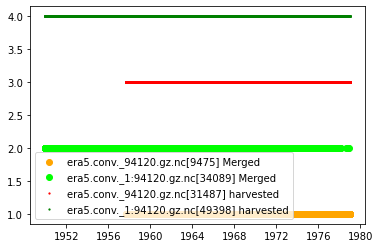

In [15]:
plot_time_distr()

100%|█████████▉| 103966/103968 [00:22<00:00, 4716.23it/s]


Plotting first plot 


100%|█████████▉| 49396/49398 [00:13<00:00, 3652.18it/s]


Plotting  1  plot 


100%|█████████▉| 31485/31487 [00:09<00:00, 3458.08it/s]


Plotting  2  plot 


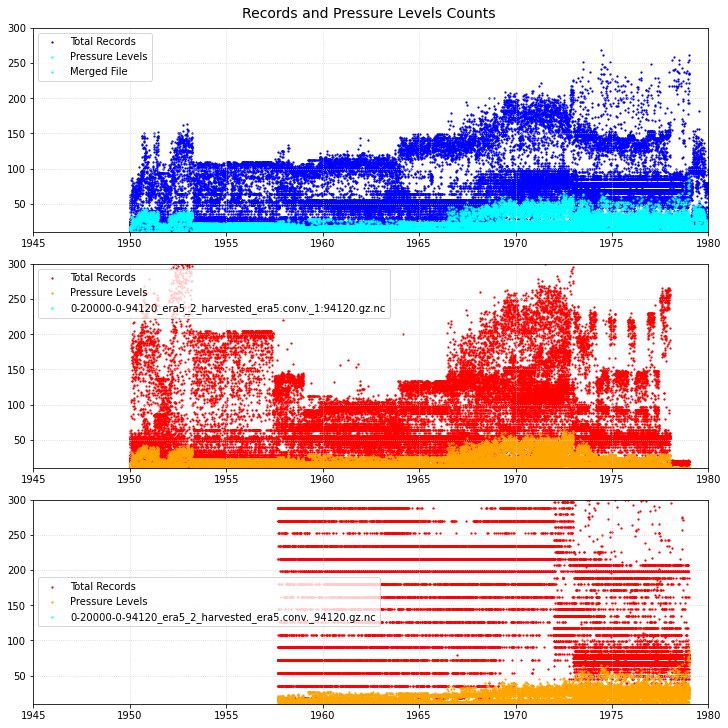

100%|█████████▉| 103966/103968 [00:22<00:00, 4671.70it/s]


Plotting first plot 


100%|█████████▉| 49396/49398 [00:13<00:00, 3654.05it/s]


Plotting  1  plot 


100%|█████████▉| 31485/31487 [00:09<00:00, 3484.09it/s]


Plotting  2  plot 


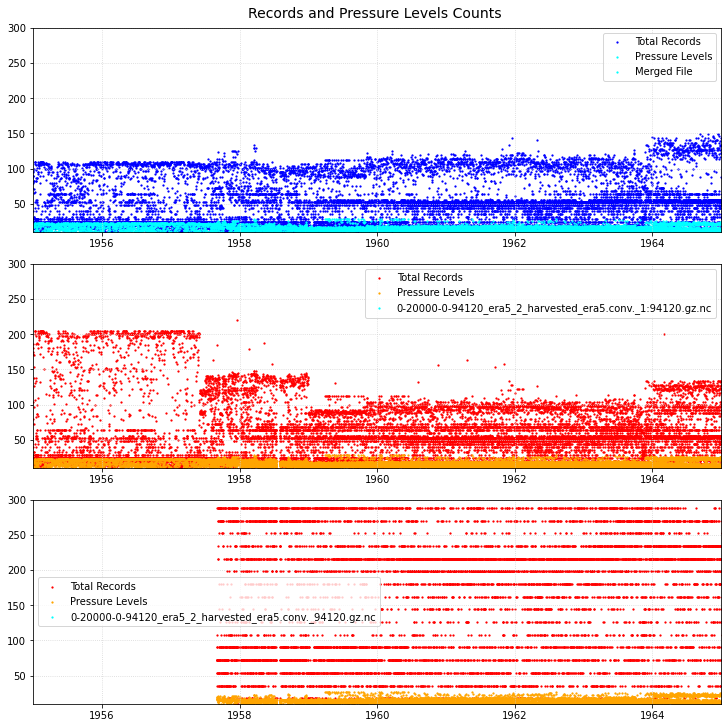

In [16]:
plot_records()  
plot_records(zoom = True )

1000


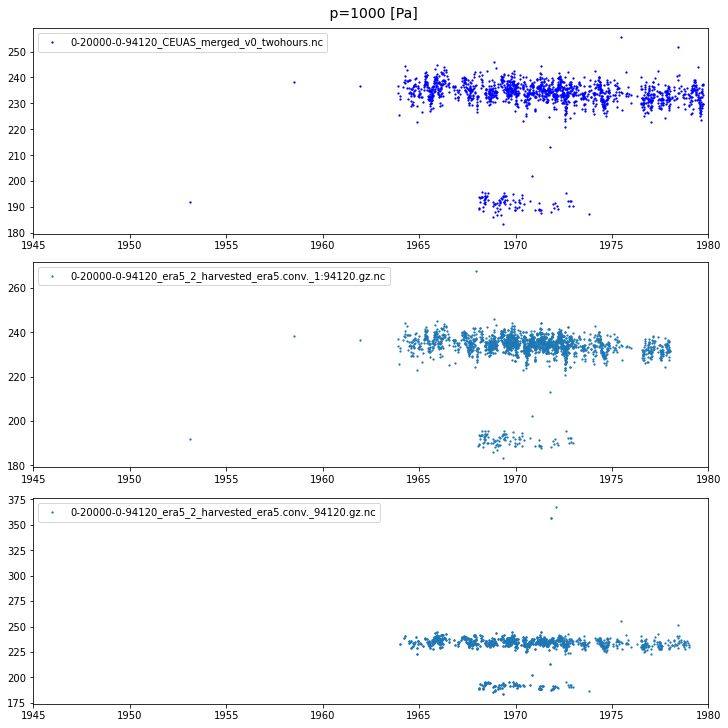

1000


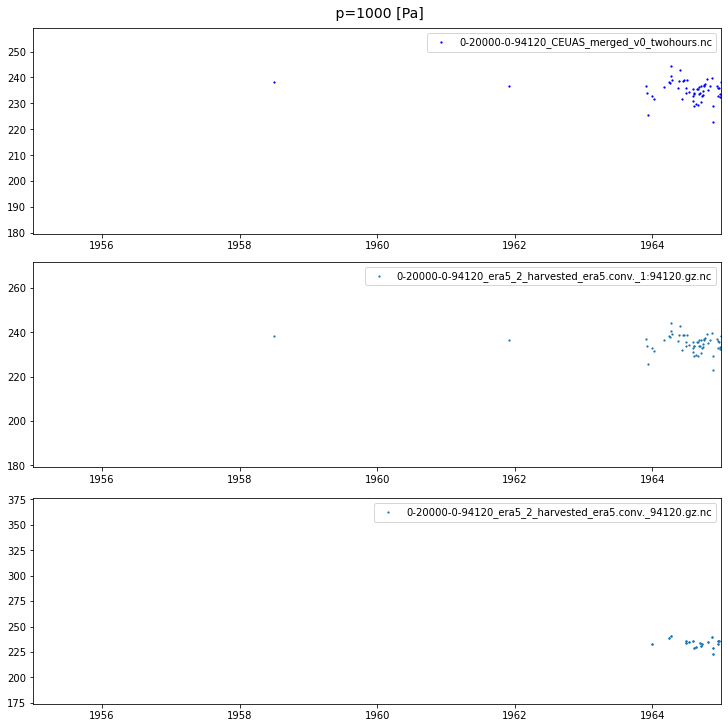

5000


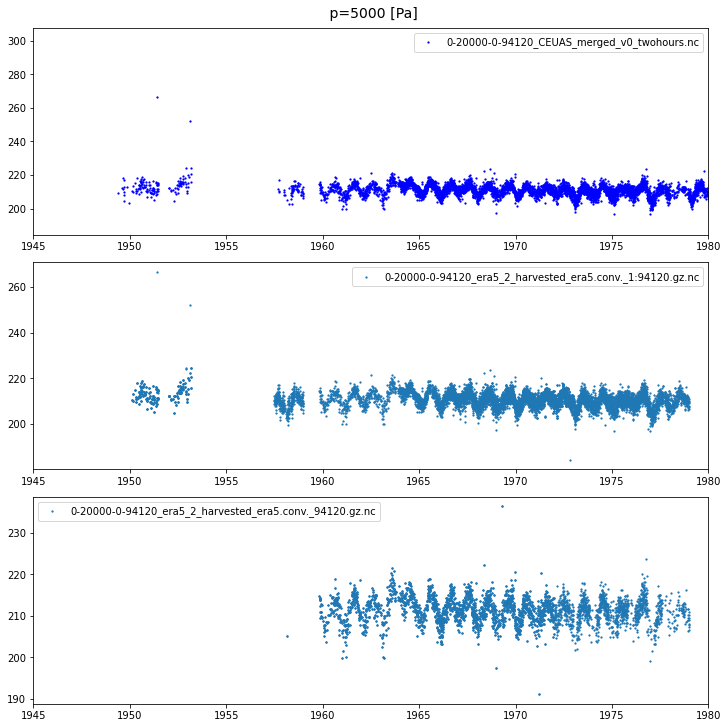

5000


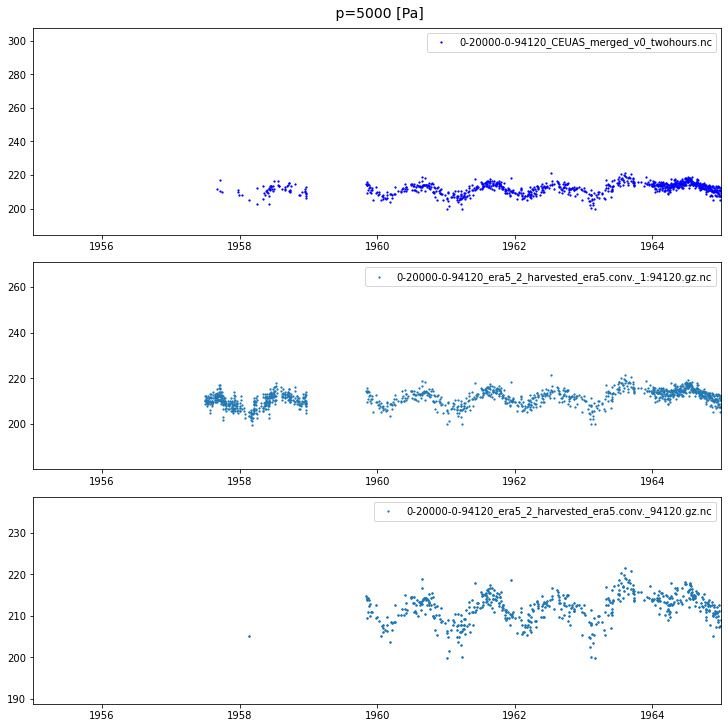

90000


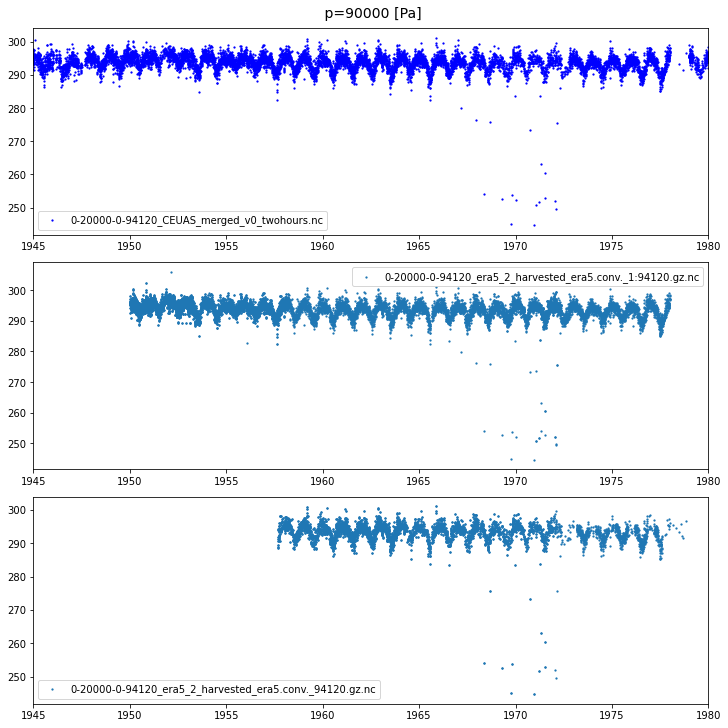

90000


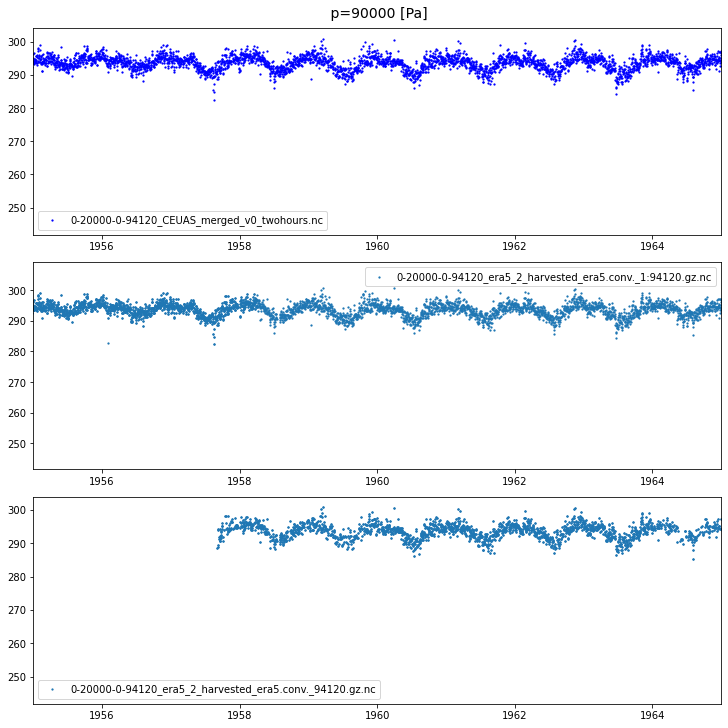

10000


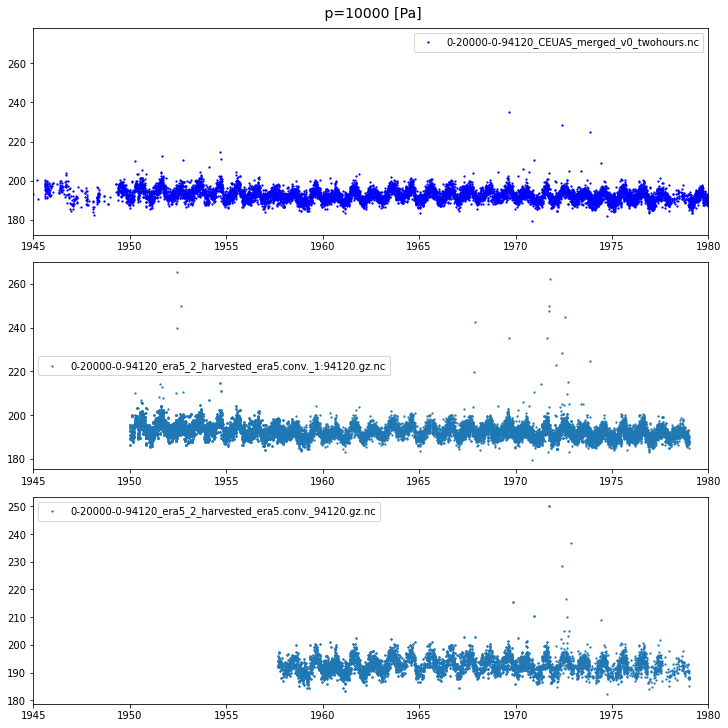

10000


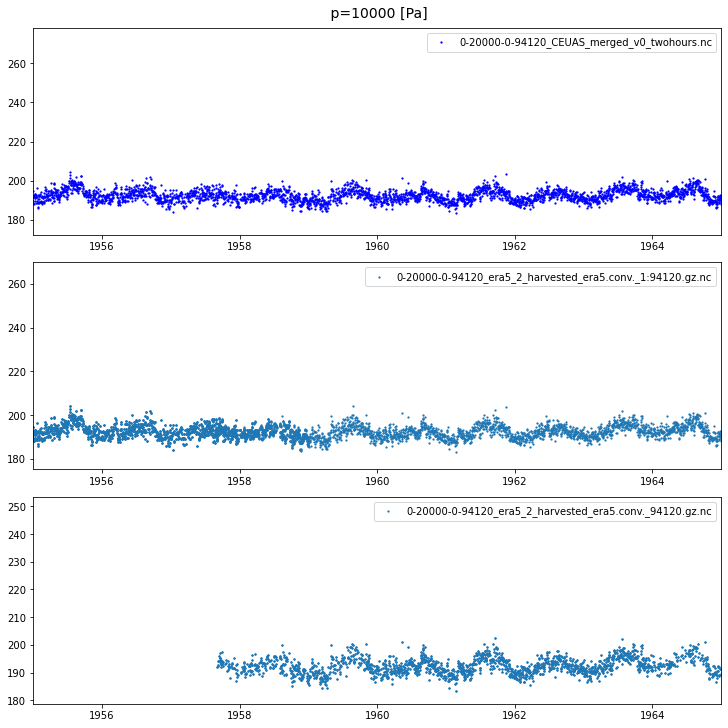

50000


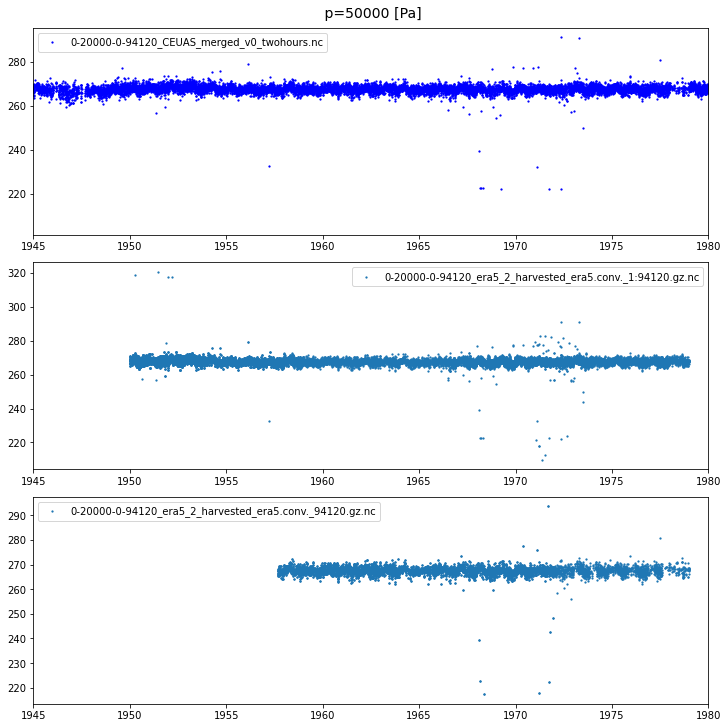

50000


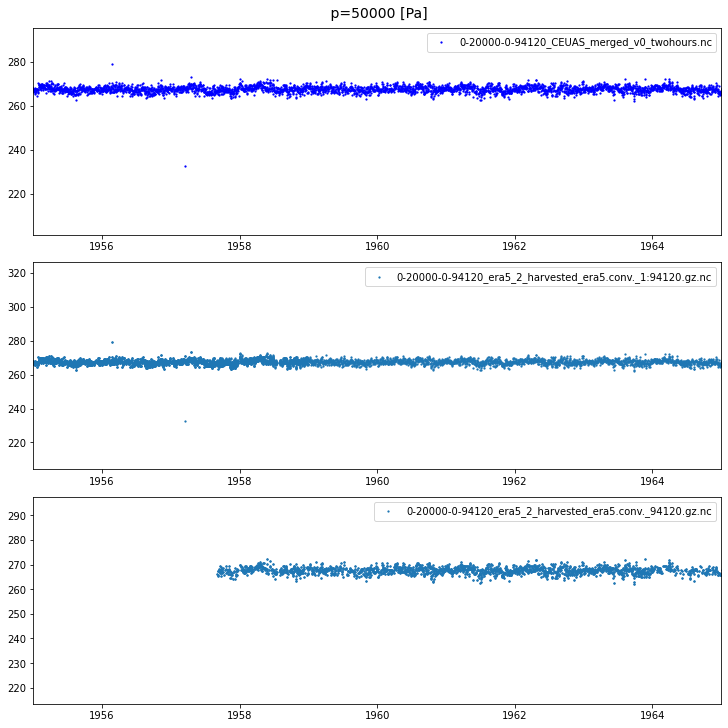

90000


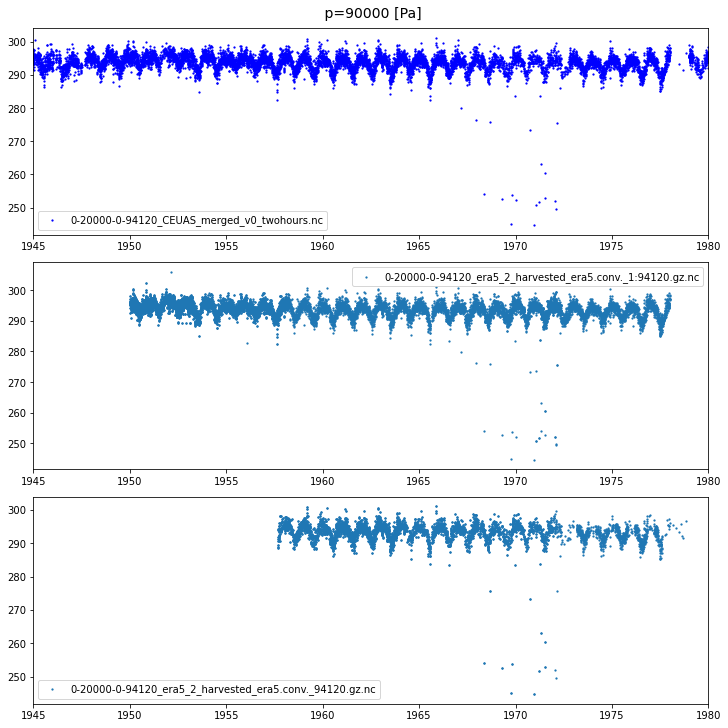

90000


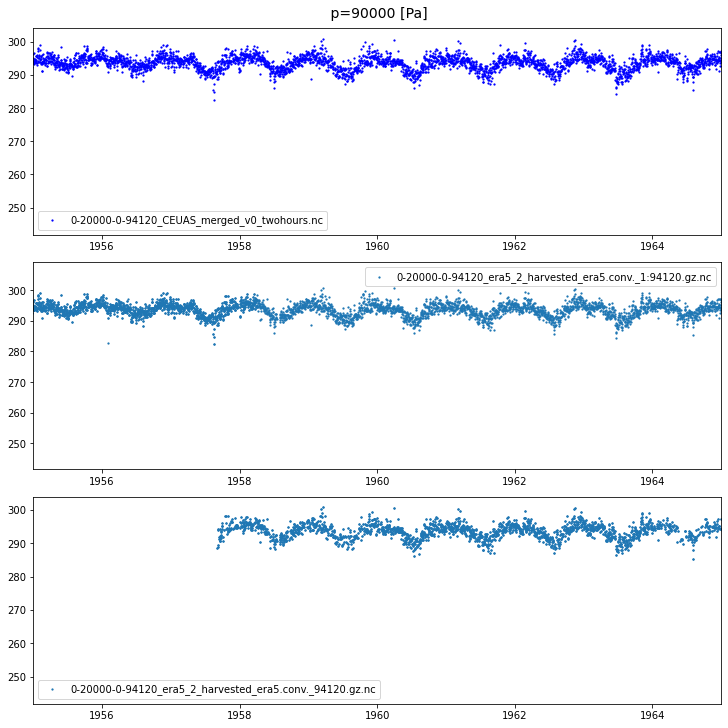

92500


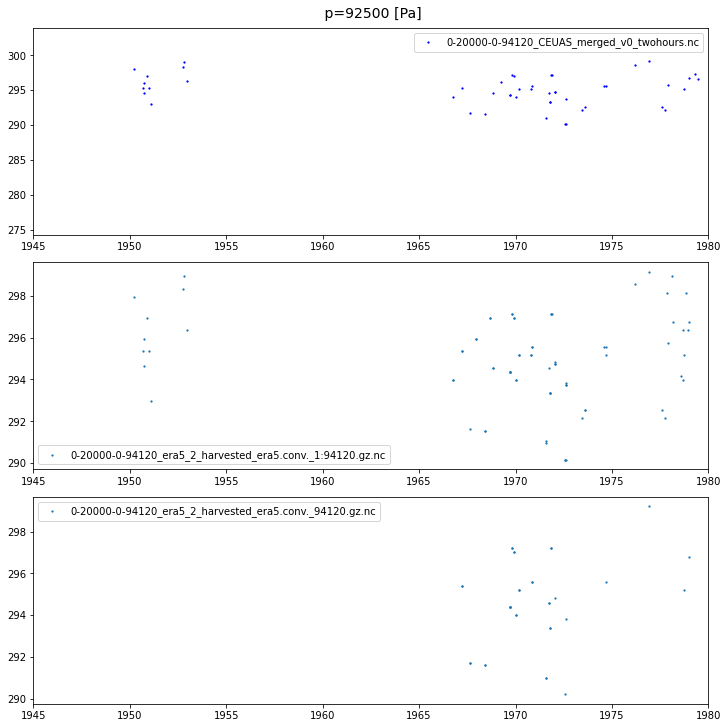

92500


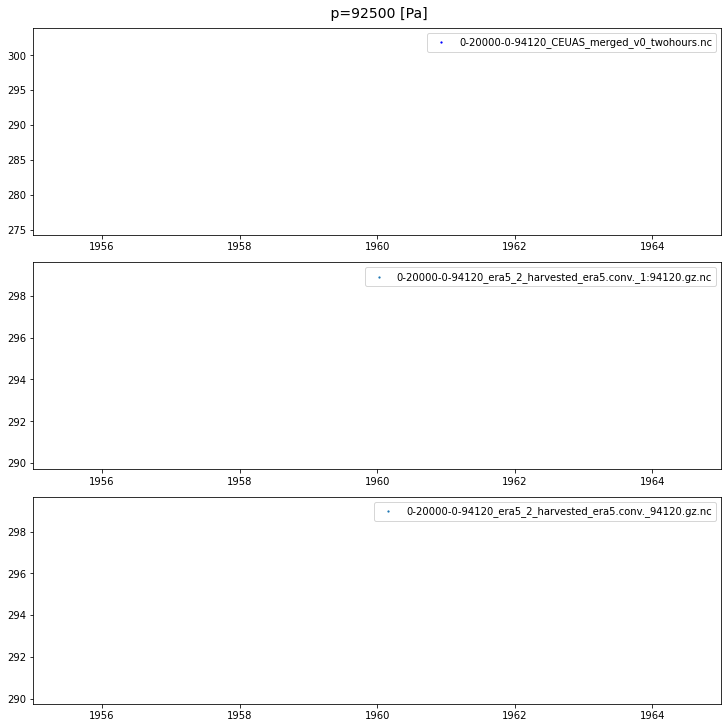

100000


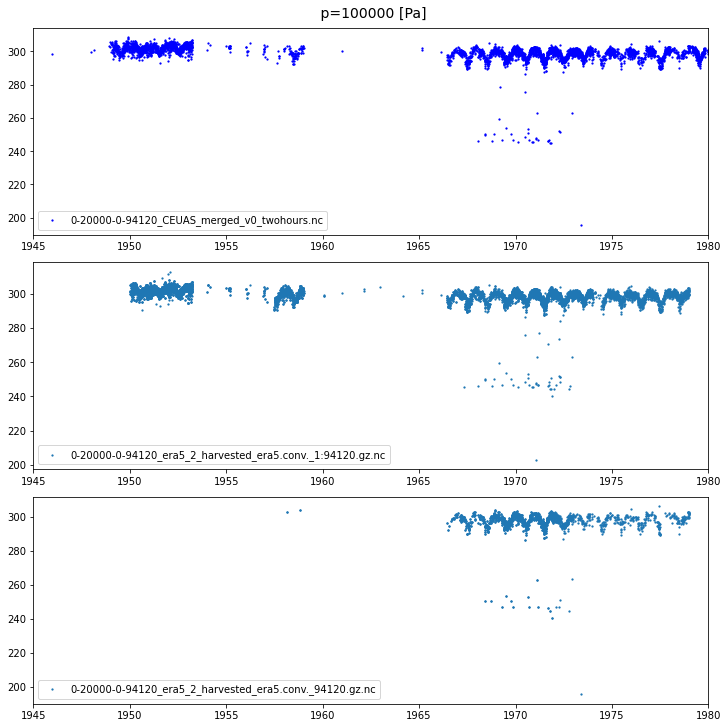

100000


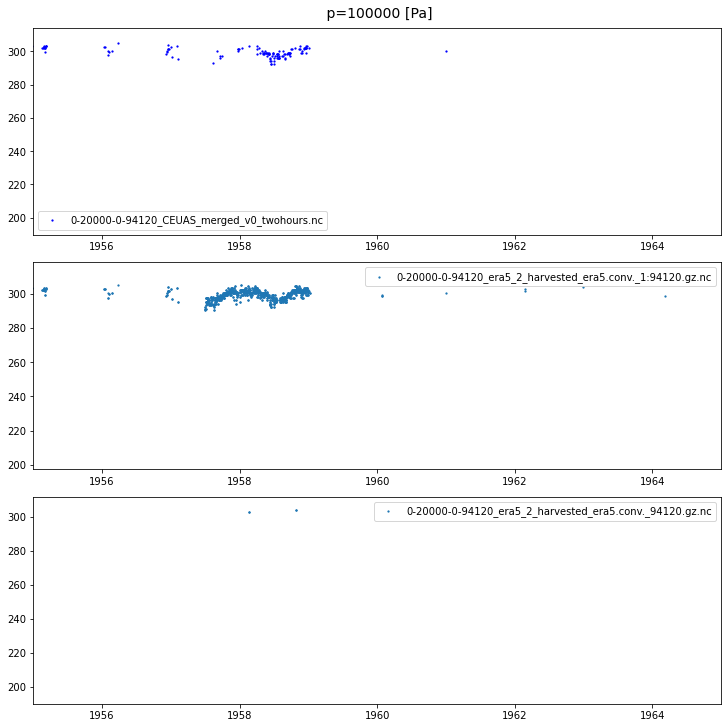

In [17]:
for p in [1000, 5000, 90000, 10000, 50000, 90000, 92500, 100000]:
    plot_comparison(p)
    plot_comparison(p, zoom= True)

            
        
        

In [24]:
## Checking presence of duplicated entries

In [27]:
! odb sql 'select date, time, varno, obsvalue, vertco_reference_1 WHERE  date=19570831 and varno=2'  -i  /raid60/scratch/leo/scratch/era5/odbs/2/era5.conv._94120 

      date@hdr	      time@hdr	    varno@body	 obsvalue@body	vertco_reference_1@body
      19570831	        230000	             2	          NULL	           95000.000000
      19570831	        230000	             2	          NULL	           90000.000000
      19570831	        230000	             2	          NULL	           85000.000000
      19570831	        230000	             2	          NULL	           75000.000000
      19570831	        230000	             2	          NULL	           70000.000000
      19570831	        230000	             2	          NULL	           60000.000000
      19570831	        230000	             2	          NULL	           50000.000000
      19570831	        230000	             2	          NULL	           40000.000000
      19570831	        230000	             2	          NULL	           30000.000000
      19570831	        230000	             2	          NULL	           25000.000000
      19570831	        230000	             2	          NULL	           20000

In [29]:
! odb sql 'select date, time, varno, obsvalue, vertco_reference_1 WHERE  date=19500101 and varno=2'  -i  /raid60/scratch/leo/scratch/era5/odbs/2/era5.conv._1:94120 

      date@hdr	      time@hdr	    varno@body	 obsvalue@body	vertco_reference_1@body
      19500101	         90000	             2	    304.950012	          100000.000000
      19500101	         90000	             2	    295.850006	           90000.000000
      19500101	         90000	             2	    294.149994	           85000.000000
      19500101	         90000	             2	    291.649994	           80000.000000
      19500101	         90000	             2	    284.149994	           70000.000000
      19500101	         90000	             2	    275.250000	           60000.000000
      19500101	         90000	             2	    266.750000	           50000.000000
      19500101	         90000	             2	    258.549988	           40000.000000
      19500101	         90000	             2	    241.550003	           30000.000000
      19500101	         90000	             2	    218.250000	           20000.000000
      19500101	         90000	             2	    204.149994	           15000